In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/earthquake-dataset/earthquake_data.csv


# Importing python libraies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading Dataset

In [3]:
earthquake=pd.read_csv('/kaggle/input/earthquake-dataset/earthquake_data.csv')
earthquake.head()

title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9  18-11-2022 13:37   
2                                      M 7.0 -         7.0  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3  11-11-2022 10:48   
4                                      M 6.6 -         6.6  09-11-2022 10:14   

   cdi  mmi  alert  tsunami  sig net  nst   dmin   gap magType    depth  \
0    8    7  green        1  768  us  117  0.509  17.0     mww   14.000   
1    4    4  green        0  735  us   99  2.229  34.0     mww   25.000   
2    3    3  green        1  755  us  147  3.125  18.0     mww  579.000   
3    5    5  green        1  833  us  149  1.865  21.0     mww   37.000   
4    0    2  green        1  670  us  131  4.998  27.0     mww  624.464   

   latitude  longitude                  location continent          country  
0   -9.7963    159.596  Malango, Solomon Islands   Oceania  Solomon Islands  
1   -4.9559    100.738       Bengkulu, Indonesia       NaN              NaN  
2  -20.0508   -178.346                       NaN   Oceania             Fiji  
3  -19.2918   -172.129             Neiafu, Tonga       NaN              NaN  
4  -25.5948    178.278                       NaN       NaN              NaN


## The meaning of all columns is as follows:

'title': title name given to the earthquake

'magnitude': The magnitude of the earthquake

'date_time': date and time

'cdi': The maximum reported intensity for the event range

'mmi': The maximum estimated instrumental intensity for the event

'alert': The alert level - “green”, “yellow”, “orange”, and “red”

'tsunami': "1" for events in oceanic regions and "0" otherwise

'sig': A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact

'net': The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.

'nst': The total number of seismic stations used to determine earthquake location.

'dmin': Horizontal distance from the epicenter to the nearest station

'gap': The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal  position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties

'magType': The method or algorithm used to calculate the preferred magnitude for the event

'depth': The depth where the earthquake begins to rupture

'latitude / longitude': coordinate system by means of which the position or location of any place on Earth's surface can be determined and described

'location': location within the country

'continent': continent of the earthquake hit country

'country': affected country

# Evaluate Dataset

In [4]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [5]:
earthquake.shape

(782, 19)

# Convert columns in correct types

In [6]:
earthquake['date_time']=pd.to_datetime(earthquake['date_time'])
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      782 non-null    object        
 1   magnitude  782 non-null    float64       
 2   date_time  782 non-null    datetime64[ns]
 3   cdi        782 non-null    int64         
 4   mmi        782 non-null    int64         
 5   alert      415 non-null    object        
 6   tsunami    782 non-null    int64         
 7   sig        782 non-null    int64         
 8   net        782 non-null    object        
 9   nst        782 non-null    int64         
 10  dmin       782 non-null    float64       
 11  gap        782 non-null    float64       
 12  magType    782 non-null    object        
 13  depth      782 non-null    float64       
 14  latitude   782 non-null    float64       
 15  longitude  782 non-null    float64       
 16  location   777 non-null    object        
 1

In [7]:
earthquake.describe()

magnitude         cdi         mmi     tsunami          sig  \
count  782.000000  782.000000  782.000000  782.000000   782.000000   
mean     6.941125    4.333760    5.964194    0.388747   870.108696   
std      0.445514    3.169939    1.462724    0.487778   322.465367   
min      6.500000    0.000000    1.000000    0.000000   650.000000   
25%      6.600000    0.000000    5.000000    0.000000   691.000000   
50%      6.800000    5.000000    6.000000    0.000000   754.000000   
75%      7.100000    7.000000    7.000000    1.000000   909.750000   
max      9.100000    9.000000    9.000000    1.000000  2910.000000   

              nst        dmin         gap       depth    latitude   longitude  
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000  
mean   230.250639    1.325757   25.038990   75.883199    3.538100   52.609199  
std    250.188177    2.218805   24.225067  137.277078   27.303429  117.898886  
min      0.000000    0.000000    0.000000    2.700000  -61.848400 -179.968000  
25%      0.000000    0.000000   14.625000   14.000000  -14.595600  -71.668050  
50%    140.000000    0.000000   20.000000   26.295000   -2.572500  109.426000  
75%    445.000000    1.863000   30.000000   49.750000   24.654500  148.941000  
max    934.000000   17.654000  239.000000  670.810000   71.631200  179.662000

# Checking null Values

In [8]:
100*earthquake.isnull().sum()/earthquake.shape[0]

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        46.930946
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.639386
continent    73.657289
country      38.107417
dtype: float64

In [9]:
earthquake['date_time'].dt.month.value_counts().sort_index()

1     59
2     57
3     59
4     58
5     59
6     55
7     69
8     71
9     66
10    77
11    92
12    60
Name: date_time, dtype: int64

In [10]:
earthquake['country'].isnull().sum()

298

In [11]:
earthquake.loc[earthquake['country'].notnull() & earthquake['location'].notnull(),['location','country']]

location          country
0    Malango, Solomon Islands  Solomon Islands
7          Boca Chica, Panama           Panama
8           Aguililla, Mexico           Mexico
9           Aguililla, Mexico           Mexico
10             Yujing, Taiwan           Taiwan
..                        ...              ...
774  Cojutepeque, El Salvador      El Salvador
775            Bhach?u, India            India
776       Bengkulu, Indonesia        Indonesia
779        Port-Olry, Vanuatu          Vanuatu
781      Lukatan, Philippines      Philippines

[482 rows x 2 columns]

The country name is in location after ','
So we can fill null countries with their locations

In [12]:
earthquake.loc[earthquake['country'].isnull() & earthquake['location'].notnull(),'country']=earthquake.loc[earthquake['country'].isnull() & earthquake['location'].notnull(),'location'].str.split(', ').str[1]
earthquake['country'].isnull().sum()

45

At first we have 298 rows with null in their countries, but now we reduce them to 45 rows

# Analysis Dataset

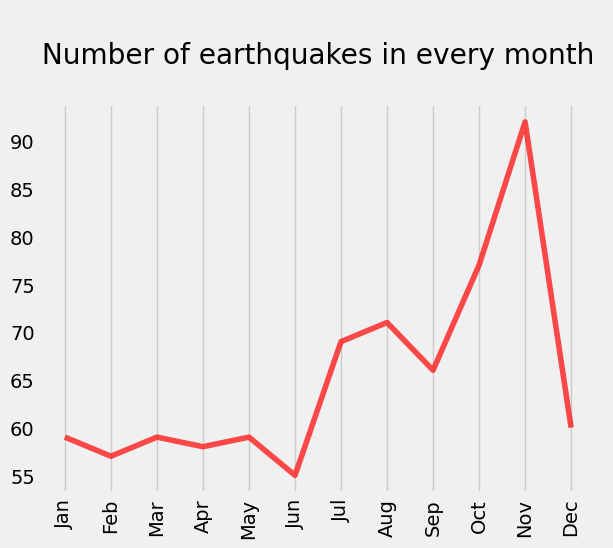

In [13]:
plt.style.use('fivethirtyeight')
data=earthquake['date_time'].dt.month.value_counts().sort_index()
plt.plot(data.index,data,color='red',alpha=0.7)
plt.xticks(ticks=range(1,13),labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],rotation=90)
# plt.set_xlabels=()
plt.title('\n Number of earthquakes in every month \n')
plt.grid(visible=False,axis='y')
plt.show()

### Result: It shows most earthqakes occured in October and November 



In [14]:
top_ten_earthqaukes=earthquake[earthquake['country'].notnull()].nlargest(10,'magnitude')
top_ten_earthqaukes[['country','magnitude']]

country  magnitude
476      Japan        9.1
668  Indonesia        9.1
517      Chile        8.8
657  Indonesia        8.6
593  Indonesia        8.4
767       Peru        8.4
285      Chile        8.3
59      Alaska        8.2
60      Alaska        8.2
170       Fiji        8.2

### Result: Countries where 10 major earthquakes occurred

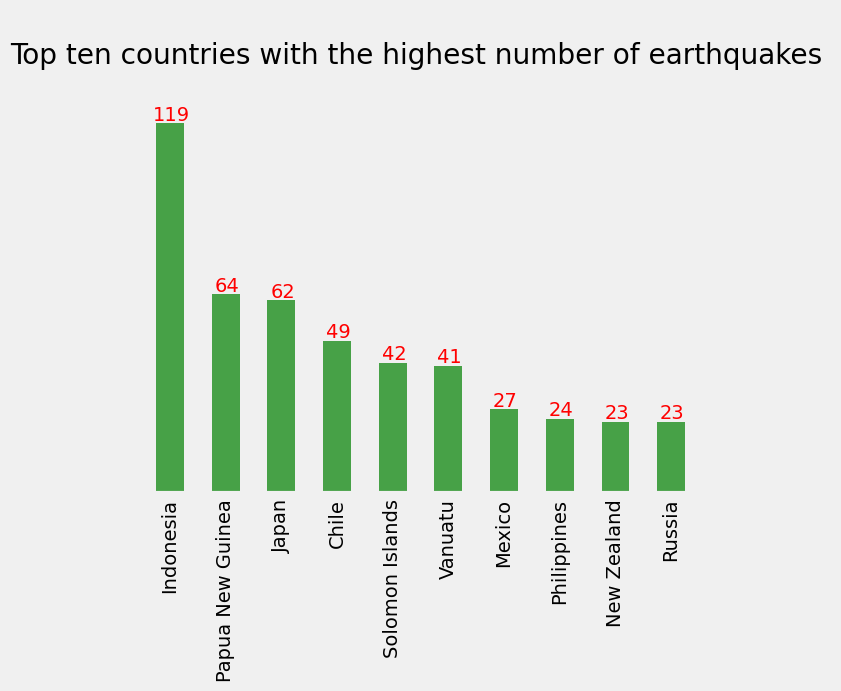

In [15]:
top_ten_country_count=earthquake.loc[earthquake['country'].notnull(),'country'].value_counts().sort_values(ascending=False)
top_ten_country_count[:10].plot.bar(alpha=0.7,color='green')
plt.grid(visible=False)
# plt.ylim(20,115)
# plt.yticks=(range(20,125,20))
plt.tick_params(labelleft=False, left=False)
plt.title('\nTop ten countries with the highest number of earthquakes \n')
plt.text(-0.3,top_ten_country_count[0]+1,top_ten_country_count[0],color='red')
plt.text(0.8,top_ten_country_count[1]+1,top_ten_country_count[1],color='red')
plt.text(1.8,top_ten_country_count[2]+1,top_ten_country_count[2],color='red')
plt.text(2.8,top_ten_country_count[3]+1,top_ten_country_count[3],color='red')
plt.text(3.8,top_ten_country_count[4]+1,top_ten_country_count[4],color='red')
plt.text(4.8,top_ten_country_count[5]+1,top_ten_country_count[5],color='red')
plt.text(5.8,top_ten_country_count[6]+1,top_ten_country_count[6],color='red')
plt.text(6.8,top_ten_country_count[7]+1,top_ten_country_count[7],color='red')
plt.text(7.8,top_ten_country_count[8]+1,top_ten_country_count[8],color='red')
plt.text(8.8,top_ten_country_count[9]+1,top_ten_country_count[9],color='red')
plt.show()


### Result: Indonesia has had the highest number of earthquakes